You can download the data used form this link: https://statso.io/forecasting-website-traffic-case-study/#google_vignette

In [43]:
import pandas as pd
data = pd.read_csv("Web_traffic Data\Forecasting Web Traffic Data.csv", on_bad_lines='skip')
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\amrk6\AppData\Local\Temp\ipykernel_26208\369990536.py:2: SyntaxWarning: invalid escape sequence '\F'
  data = pd.read_csv("Web_traffic Data\Forecasting Web Traffic Data.csv", on_bad_lines='skip')


,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [44]:
import matplotlib.pyplot as plt

In [45]:
data["Date"] = pd.to_datetime(data["Date"],format= "%d/%m/%Y")
data.head()

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401
3,2021-06-04,7054
4,2021-06-05,7973


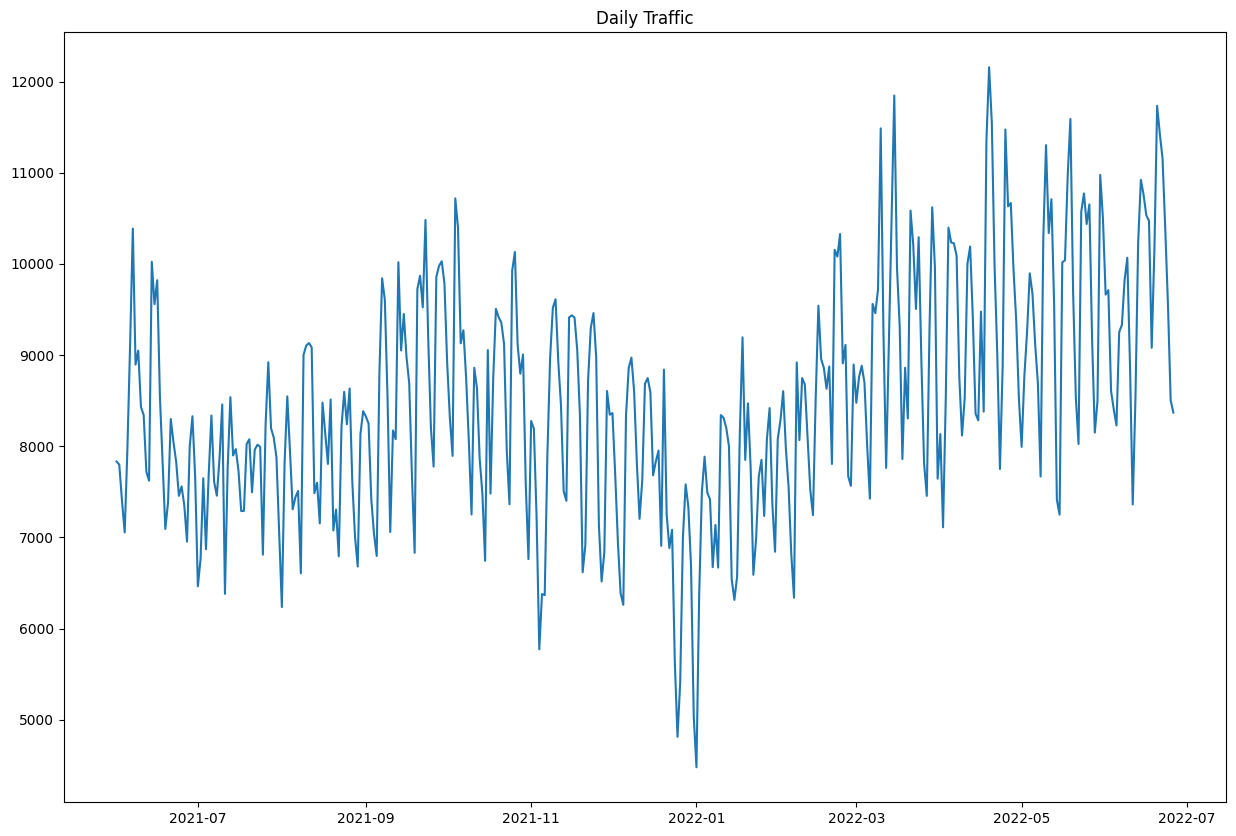

In [46]:
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic")
plt.show()

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

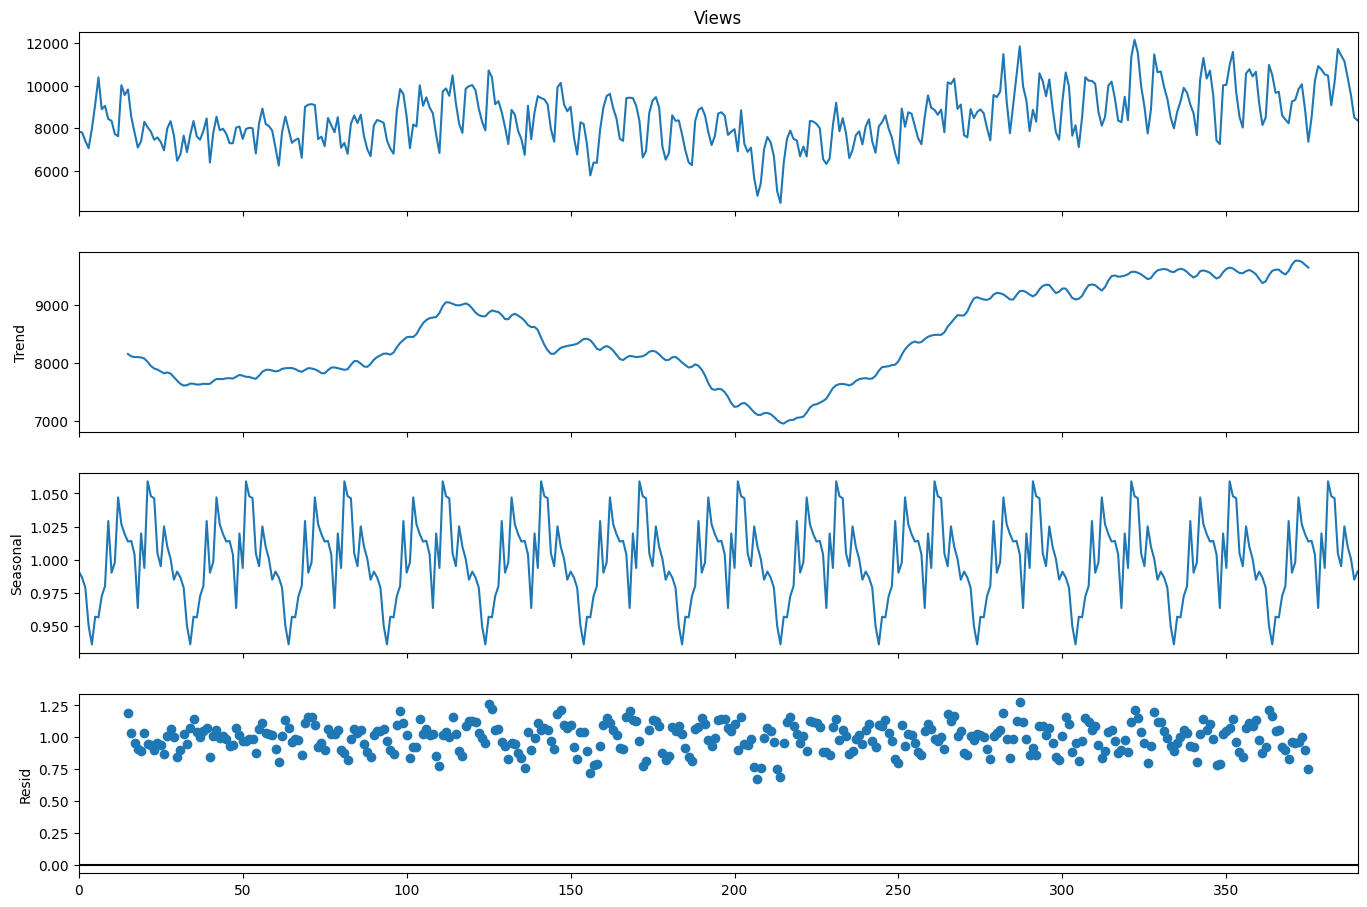

In [48]:
result = seasonal_decompose(data['Views'], model='multiplicative', period=30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

From the above data we can see that the traffic for this website is seasonal

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

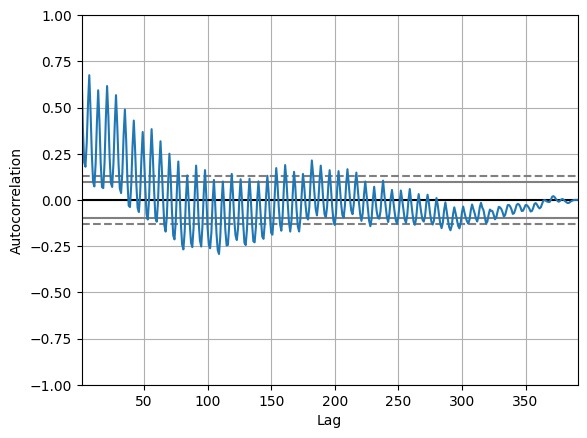

In [49]:
pd.plotting.autocorrelation_plot(data["Views"])

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf

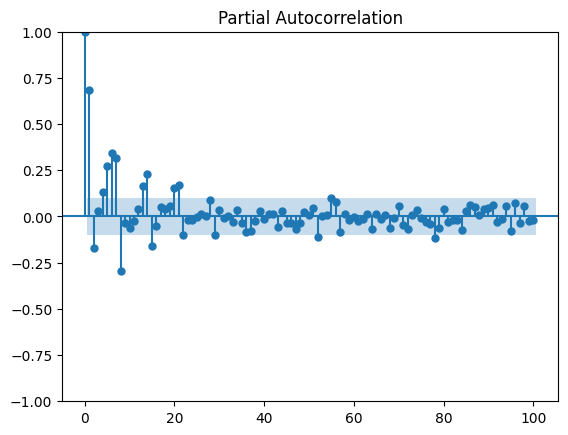

In [51]:
plot_pacf(data["Views"], lags = 100)
plt.show()

In [52]:
import statsmodels.api as sm

In [53]:
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))

In [54]:
model = model.fit()

a:\Pycharm\pycharm\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
a:\Pycharm\pycharm\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
predictions = model.predict(len(data), len(data) + 50)
print(predictions)

391     9862.109033
392    10764.194855
393    10720.946573
394     9836.977163
395     8752.314819
396     8196.381876
397     8903.764055
398     9679.473895
399    10268.423058
400    10588.587767
401     9785.708094
402     9313.362989
403     9013.207425
404     9054.459038
405    10526.382672
406    10988.212197
407    10839.965557
408    10018.870451
409     9399.319537
410     8593.516590
411     9138.551989
412    10391.841286
413    10592.181636
414    10765.802147
415    10220.560154
416     9401.568144
417     9025.304670
418     9159.894900
419     9904.492120
420    10234.962763
421    10690.537792
422     9855.126059
423     9505.980310
424     9037.157190
425     8781.749787
426    10108.939304
427    10822.492393
428    10872.604578
429    10350.255254
430     9383.539067
431     8621.995352
432     8665.077164
433    10036.714837
434    10484.412323
435    10798.900180
436    10434.850211
437     9271.348434
438     9129.731925
439     9328.042114
440    10285.331577
